In [1]:
import numpy as np
import pandas as pd

# series are 1d and dataframe are 2d objects

- but why?
- and what exactly is index?

- Series haveing "index" and "value".
- Dataframe is Tabular data where we have "rows" and "columns".
- Series is one dimensional object and dataframe is two dimensional object.
- In series for fetching value we need one piece of information which is corresponding "Index ".
- In DF for fetching any value we need to give two piece of information - "Index name" , "Column Name"

- what if i want to create series where we have more than one Index.

# can we have Multiplex Index--- Let's Try

In [2]:
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece',2020), ('ece', 2021), ('ece',2022)]

In [4]:
a = pd.Series([1,2,3,4,5,6,7,8], index = index_val)

In [5]:
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [6]:
# for finding 3 in a code:

In [8]:
a[('cse', 2022)]

4

# The Problem ?

In [9]:
a['cse'] # here you have to right both value for fetching data so its not right way to create multiindex series.

KeyError: 'cse'

# The Solution ->

# MultiIndex series also known as "Hierarchiacal Indexing"

#### Multiple Index levels within a single Index

# How to create MultiIndex Object

### 1- pd.MultiIndex.from_tuples()
### 2. pd.MultiIndex.from_product()

In [10]:
index_val = [('cse', 2019), ('cse', 2020), ('cse', 2021), ('cse', 2022), ('ece', 2019), ('ece',2020), ('ece', 2021), ('ece',2022)]

In [12]:
multiindex = pd.MultiIndex.from_tuples(index_val)

In [13]:
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [15]:
multiindex.levels[1]

Int64Index([2019, 2020, 2021, 2022], dtype='int64')

In [16]:
multiindex.levels[0]

Index(['cse', 'ece'], dtype='object')

## 2. pd.MultiIndex.from_product()

In [20]:
pd.MultiIndex.from_product([['cse','ece'], [2019,2020,2021,2022]])

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [21]:
# level inside multiindex object

# # creating a series with multiindex object

In [23]:
s = pd.Series([1,2,3,4,5,6,7,8], index = multiindex)

In [24]:
s

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

# how to fetch items from a series

In [25]:
s[('cse', 2022)]

4

In [26]:
s['cse']

2019    1
2020    2
2021    3
2022    4
dtype: int64

In [27]:
s['ece']

2019    5
2020    6
2021    7
2022    8
dtype: int64

In [28]:
s[('ece',2020)]

6

# A logical question to ask

- There is Function called "UNSTACK"


# UNSTACK
#### - it convert "MultiIndex Series" into "DATAFRAME"

In [33]:
temp = s.unstack()
# inside index convert into "column"
# outside index convert into "row"

In [34]:
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


# STACK
#### - converting DATAFRAME into MultiIndex Series.

In [35]:
temp.unstack()

2019  cse    1
      ece    5
2020  cse    2
      ece    6
2021  cse    3
      ece    7
2022  cse    4
      ece    8
dtype: int64

# when we should use "MultiIndex Series"

- converting "HigherDImension data" into "LowerDimension data"
- we can convert 4d data or 3d or 10d data into 2d data.
- we can convery higher dimension data into "series" and "dataframe"

# MultiIndex DataFrame

- in this we need to ask 3 piece of information to get any value.
- ex - first "branch - ece or cse" , "year" then "no.of student" or "package" then i will get value.

In [36]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16]
    
],
index = multiindex,
columns = ['avg_package', 'students']
)

In [37]:
multiindex

MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [38]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [39]:
branch_df1['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

In [40]:
branch_df1['students']

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

# DOING MULTIINDEX FROM PRODUCT IN COLUMNS

In [41]:
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [42]:
branch_df2['delhi']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [43]:
branch_df2['mumbai']

,avg_package,students
2019,0,0
2020,0,0
2021,0,0
2022,0,0


In [44]:
branch_df2['mumbai']['avg_package']

2019    0
2020    0
2021    0
2022    0
Name: avg_package, dtype: int64

In [45]:
branch_df2.loc[2019] # for fetching row index

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [46]:
branch_df2.loc[2022] 

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: 2022, dtype: int64

# Multiindex df in terms of both cols and index

In [47]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [48]:
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [53]:
branch_df3['mumbai']

avg_package  students
cse 2019            0         0
    2020            0         0
    2021            0         0
    2022            0         0
ece 2019            0         0
    2020            0         0
    2021            0         0
    2022            0         0

# Stacking and Unstacking

In [63]:
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [65]:
branch_df1.unstack()
# unstack take second index and convert into column

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [66]:
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [69]:
branch_df2.stack()

delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [70]:
branch_df2.unstack()

delhi   avg_package  2019    1
                     2020    3
                     2021    5
                     2022    7
        students     2019    2
                     2020    4
                     2021    6
                     2022    8
mumbai  avg_package  2019    0
                     2020    0
                     2021    0
                     2022    0
        students     2019    0
                     2020    0
                     2021    0
                     2022    0
dtype: int64

In [75]:
branch_df3.unstack().unstack()
# 2 time unstacking will move to 3 no of index to unpack

delhi   avg_package  2019  cse     1
                           ece     9
                     2020  cse     3
                           ece    11
                     2021  cse     5
                           ece    13
                     2022  cse     7
                           ece    15
        students     2019  cse     2
                           ece    10
                     2020  cse     4
                           ece    12
                     2021  cse     6
                           ece    14
                     2022  cse     8
                           ece    16
mumbai  avg_package  2019  cse     0
                           ece     0
                     2020  cse     0
                           ece     0
                     2021  cse     0
                           ece     0
                     2022  cse     0
                           ece     0
        students     2019  cse     0
                           ece     0
                     2020  cse     0
 

In [76]:
branch_df3.unstack().stack()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [77]:
branch_df3.unstack().stack().stack()
# stack convert column into index

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [89]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [91]:
branch_df3.stack() # converted second column into second index (avg_package into rows)

delhi  mumbai
cse 2019 avg_package      1       0
         students         2       0
    2020 avg_package      3       0
         students         4       0
    2021 avg_package      5       0
         students         6       0
    2022 avg_package      7       0
         students         8       0
ece 2019 avg_package      9       0
         students        10       0
    2020 avg_package     11       0
         students        12       0
    2021 avg_package     13       0
         students        14       0
    2022 avg_package     15       0
         students        16       0

In [92]:
branch_df3.stack().stack() #  now no column will remain and 4 row index created.

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

In [78]:
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [84]:
branch_df2.stack()

delhi  mumbai
2019 avg_package      1       0
     students         2       0
2020 avg_package      3       0
     students         4       0
2021 avg_package      5       0
     students         6       0
2022 avg_package      7       0
     students         8       0

In [85]:
branch_df2.stack().stack()

2019  avg_package  delhi     1
                   mumbai    0
      students     delhi     2
                   mumbai    0
2020  avg_package  delhi     3
                   mumbai    0
      students     delhi     4
                   mumbai    0
2021  avg_package  delhi     5
                   mumbai    0
      students     delhi     6
                   mumbai    0
2022  avg_package  delhi     7
                   mumbai    0
      students     delhi     8
                   mumbai    0
dtype: int64

In [88]:
branch_df2.unstack().unstack() 

2019  2020  2021  2022
delhi  avg_package     1     3     5     7
       students        2     4     6     8
mumbai avg_package     0     0     0     0
       students        0     0     0     0

In [93]:
branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [94]:
branch_df2.unstack()

delhi   avg_package  2019    1
                     2020    3
                     2021    5
                     2022    7
        students     2019    2
                     2020    4
                     2021    6
                     2022    8
mumbai  avg_package  2019    0
                     2020    0
                     2021    0
                     2022    0
        students     2019    0
                     2020    0
                     2021    0
                     2022    0
dtype: int64

# Working with multiindex dataframes

In [95]:
# head and tail
branch_df3.head()
# shape
branch_df3.shape
# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()
branch_df3.isnull()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [96]:
branch_df3.head()

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0

In [97]:
branch_df3.shape

(8, 4)

In [98]:
branch_df3.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8 entries, ('cse', 2019) to ('ece', 2022)
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   (delhi, avg_package)   8 non-null      int64
 1   (delhi, students)      8 non-null      int64
 2   (mumbai, avg_package)  8 non-null      int64
 3   (mumbai, students)     8 non-null      int64
dtypes: int64(4)
memory usage: 932.0+ bytes


In [99]:
branch_df3.duplicated()

cse  2019    False
     2020    False
     2021    False
     2022    False
ece  2019    False
     2020    False
     2021    False
     2022    False
dtype: bool

In [100]:
branch_df3.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

# Extracting rows single
# for name indexing generally we use (.loc) instead of (.iloc)

In [60]:
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [61]:
branch_df3.loc[('ece',2022)]

delhi   avg_package    15
        students       16
mumbai  avg_package     0
        students        0
Name: (ece, 2022), dtype: int64

# multiple rows fetching 

In [101]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [103]:
# - find first , third , fifth row

In [104]:
branch_df3.loc[('cse', 2019):('ece', 2020)]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0

In [105]:
branch_df3.loc[('cse', 2019):('ece', 2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [106]:
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

# extracting cols

In [108]:
branch_df3['delhi']

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [109]:
branch_df3['delhi']['avg_package']

cse  2019     1
     2020     3
     2021     5
     2022     7
ece  2019     9
     2020    11
     2021    13
     2022    15
Name: avg_package, dtype: int64

# extracting Multiple columns

In [110]:
# branch cse find delhi student and mumbai package

In [112]:
branch_df3.iloc[:,1:3] # colon fetch all rows, 1:3 is avg_package to avg_package index

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [113]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [114]:
# find cse first row and ece first row and delhi students and mumbai avg_package

In [115]:
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


# Sorting Index 

### both -> descending -> diff order
## # based on one level

In [117]:
branch_df3.sort_index(ascending = False)
# ece come first and year 2022 come first

delhi               mumbai         
         avg_package students avg_package students
ece 2022          15       16           0        0
    2021          13       14           0        0
    2020          11       12           0        0
    2019           9       10           0        0
cse 2022           7        8           0        0
    2021           5        6           0        0
    2020           3        4           0        0
    2019           1        2           0        0

In [119]:
branch_df3.sort_index(ascending = [False,True])
# first row sort descending and second row ascending

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

# sort only with one row basis 

In [120]:
branch_df3.sort_index(level = 1, ascending = [False])

delhi               mumbai         
         avg_package students avg_package students
cse 2022           7        8           0        0
ece 2022          15       16           0        0
cse 2021           5        6           0        0
ece 2021          13       14           0        0
cse 2020           3        4           0        0
ece 2020          11       12           0        0
cse 2019           1        2           0        0
ece 2019           9       10           0        0

In [121]:
branch_df3.sort_index(level = 0, ascending = [False])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

# Multiindex Datframe - transpose

In [122]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [123]:
branch_df3.T

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

In [124]:
branch_df3.transpose()

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

# SwapLevel
- covert inside row index into outside index row
- can convert inside column label into outside column label

In [126]:
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [125]:
branch_df3.swaplevel()

delhi               mumbai         
         avg_package students avg_package students
2019 cse           1        2           0        0
2020 cse           3        4           0        0
2021 cse           5        6           0        0
2022 cse           7        8           0        0
2019 ece           9       10           0        0
2020 ece          11       12           0        0
2021 ece          13       14           0        0
2022 ece          15       16           0        0

In [128]:
branch_df3.swaplevel(axis = 1)

avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

# Long Vs Wide Data

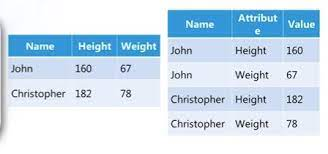

## Wide format-
- It is where we have a single row for every data point with multiple columns to hold the values of various attributes.

## Long format
- It is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.


### wide to long
### melt conert "wide dataformat" into "long dataformat"
###  "wide format" means column is more than rows
### "long format" means row is more than column

In [134]:
### melt -> simple example branch
# wide to long

In [136]:
pd.DataFrame({'cse': [120]}).melt()

,variable,value
0,cse,120


# melt -> branch with year

In [137]:
pd.DataFrame({'cse':[120], 'ece':[100],'mech':[50]}).melt(var_name = 'branch', value_name = 'num_students')

,branch,num_students
0,cse,120
1,ece,100
2,mech,50


# converting wide data format into long data format using "melt"

In [138]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


# melt -> real world example


In [130]:
death = pd.read_csv('/Users/nimishasingh/DS - Nimisha Interview Files/Pandas/session-datasets/datasets-session-21/time_series_covid19_deaths_global.csv')
confirm = pd.read_csv('/Users/nimishasingh/DS - Nimisha Interview Files/Pandas/session-datasets/datasets-session-21/time_series_covid19_confirmed_global.csv')

In [131]:
death # currently its wide format as we have 1081 column.

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4022,4022,4023,4023,4024,4024,4024,4024


In [132]:
confirm

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,334021,334021,334066,334108,334196,334294,334425,334425,334629,334661


In [141]:
confirm.shape # this is alos wide format data as column is more than rows 1081 column.

(289, 1081)

In [142]:
# now I will convert them in normal format means rows is higher than column by using "melt" 

### first step - firstly melt both data frame (confirm , death)
### second step - merge both data 

In [143]:
# we want to convert only date column into rows.

In [144]:
death.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595


In [145]:
death.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'])

# now can check no. of rows is 311253 and column is 5

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [148]:
death = death.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'date', value_name = 'num_deaths')

In [149]:
death

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,4024


In [146]:
confirm.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812


In [150]:
confirm = confirm.melt(id_vars = ['Province/State', 'Country/Region', 'Lat', 'Long'], var_name = 'date', value_name = 'num_cases')

In [151]:
confirm

,Province/State,Country/Region,Lat,Long,date,num_cases
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661


# merging both data

In [153]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

,Country/Region,date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


In [154]:
# merge both data based on 4 column which is common - 'Province/State','Country/Region','Lat','Long','date'

# Pivot Table
- The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
- Pivot Table generally use on "categorical Column" so in which data where "categorical column" is higher in number
we can use pivot table.
- pivot_table(values - it should be numerical column only )

In [209]:
import numpy as np
import pandas as pd
import seaborn as sns

In [210]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [157]:
df.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [158]:
df.groupby(['sex','smoker'])[['total_bill']]

In [159]:
df.groupby(['sex','smoker'])[['total_bill']].mean()

total_bill
sex    smoker            
Male   Yes      22.284500
       No       19.791237
Female Yes      17.977879
       No       18.105185

In [160]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()
# by using unstack second row index "smoker" will convert into column.

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [162]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [161]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [168]:
df.pivot_table(index= ['day','smoker', 'time'] ,columns='sex',values= ['total_bill','tip'])

tip           total_bill           
sex                     Male    Female       Male     Female
day  smoker time                                            
Thur Yes    Lunch   3.058000  2.990000  19.171000  19.218571
     No     Lunch   2.941500  2.437083  18.486500  15.899167
            Dinner       NaN  3.000000        NaN  18.780000
Fri  Yes    Lunch   1.900000  2.660000  11.386667  13.260000
            Dinner  3.246000  2.700000  25.892000  12.200000
     No     Lunch        NaN  3.000000        NaN  15.980000
            Dinner  2.500000  3.250000  17.475000  22.750000
Sat  Yes    Dinner  2.879259  2.868667  21.837778  20.266667
     No     Dinner  3.256563  2.724615  19.929063  19.003846
Sun  Yes    Dinner  3.521333  3.500000  26.141333  16.540000
     No     Dinner  3.115349  3.329286  20.403256  20.824286

In [169]:
df.pivot_table(index= ['day','smoker', 'time'] ,columns='sex',values= ['total_bill','tip']).unstack()

tip                               total_bill             \
sex            Male              Female                 Male              
time          Lunch    Dinner     Lunch    Dinner      Lunch     Dinner   
day  smoker                                                               
Thur Yes     3.0580       NaN  2.990000       NaN  19.171000        NaN   
     No      2.9415       NaN  2.437083  3.000000  18.486500        NaN   
Fri  Yes     1.9000  3.246000  2.660000  2.700000  11.386667  25.892000   
     No         NaN  2.500000  3.000000  3.250000        NaN  17.475000   
Sat  Yes        NaN  2.879259       NaN  2.868667        NaN  21.837778   
     No         NaN  3.256563       NaN  2.724615        NaN  19.929063   
Sun  Yes        NaN  3.521333       NaN  3.500000        NaN  26.141333   
     No         NaN  3.115349       NaN  3.329286        NaN  20.403256   

                                   
sex             Female             
time             Lunch     Dinner  
day  smoker                        
Thur Yes     19.218571        NaN  
     No      15.899167  18.780000  
Fri  Yes     13.260000  12.200000  
     No      15.980000  22.750000  
Sat  Yes           NaN  20.266667  
     No            NaN  19.003846  
Sun  Yes           NaN  16.540000  
     No            NaN  20.824286

In [211]:
df.pivot_table(index = ['sex', 'smoker'], columns = ['day', 'time'], values = ["total_bill", 'tip'])

tip                                         total_bill  \
day                Thur          Fri              Sat       Sun       Thur   
time              Lunch Dinner Lunch Dinner    Dinner    Dinner      Lunch   
sex    smoker                                                                
Male   Yes     3.058000    NaN  1.90  3.246  2.879259  3.521333  19.171000   
       No      2.941500    NaN   NaN  2.500  3.256563  3.115349  18.486500   
Female Yes     2.990000    NaN  2.66  2.700  2.868667  3.500000  19.218571   
       No      2.437083    3.0  3.00  3.250  2.724615  3.329286  15.899167   

                                                               
day                         Fri                Sat        Sun  
time          Dinner      Lunch  Dinner     Dinner     Dinner  
sex    smoker                                                  
Male   Yes       NaN  11.386667  25.892  21.837778  26.141333  
       No        NaN        NaN  17.475  19.929063  20.403256  
Female Yes       NaN  13.260000  12.200  20.266667  16.540000  
       No      18.78  15.980000  22.750  19.003846  20.824286

In [170]:
df.pivot_table(index= ['day','smoker', 'time'] ,columns='sex',values= ['total_bill','tip']).unstack().unstack()

tip                                                         \
sex      Male                             Female                       
time    Lunch            Dinner            Lunch              Dinner   
smoker    Yes      No       Yes        No    Yes        No       Yes   
day                                                                    
Thur    3.058  2.9415       NaN       NaN   2.99  2.437083       NaN   
Fri     1.900     NaN  3.246000  2.500000   2.66  3.000000  2.700000   
Sat       NaN     NaN  2.879259  3.256563    NaN       NaN  2.868667   
Sun       NaN     NaN  3.521333  3.115349    NaN       NaN  3.500000   

                 total_bill                                            \
sex                    Male                                    Female   
time                  Lunch              Dinner                 Lunch   
smoker        No        Yes       No        Yes         No        Yes   
day                                                                     
Thur    3.000000  19.171000  18.4865        NaN        NaN  19.218571   
Fri     3.250000  11.386667      NaN  25.892000  17.475000  13.260000   
Sat     2.724615        NaN      NaN  21.837778  19.929063        NaN   
Sun     3.329286        NaN      NaN  26.141333  20.403256        NaN   

                                         
sex                                      
time                  Dinner             
smoker         No        Yes         No  
day                                      
Thur    15.899167        NaN  18.780000  
Fri     15.980000  12.200000  22.750000  
Sat           NaN  20.266667  19.003846  
Sun           NaN  16.540000  20.824286

In [171]:
df.pivot_table(index= ['day','smoker', 'time'] ,columns='sex',values= ['total_bill','tip'])

tip           total_bill           
sex                     Male    Female       Male     Female
day  smoker time                                            
Thur Yes    Lunch   3.058000  2.990000  19.171000  19.218571
     No     Lunch   2.941500  2.437083  18.486500  15.899167
            Dinner       NaN  3.000000        NaN  18.780000
Fri  Yes    Lunch   1.900000  2.660000  11.386667  13.260000
            Dinner  3.246000  2.700000  25.892000  12.200000
     No     Lunch        NaN  3.000000        NaN  15.980000
            Dinner  2.500000  3.250000  17.475000  22.750000
Sat  Yes    Dinner  2.879259  2.868667  21.837778  20.266667
     No     Dinner  3.256563  2.724615  19.929063  19.003846
Sun  Yes    Dinner  3.521333  3.500000  26.141333  16.540000
     No     Dinner  3.115349  3.329286  20.403256  20.824286

In [172]:
df.pivot_table(index= ['day','smoker', 'time'] ,columns='sex',values= ['total_bill','tip']).stack()

tip  total_bill
day  smoker time   sex                         
Thur Yes    Lunch  Male    3.058000   19.171000
                   Female  2.990000   19.218571
     No     Lunch  Male    2.941500   18.486500
                   Female  2.437083   15.899167
            Dinner Female  3.000000   18.780000
Fri  Yes    Lunch  Male    1.900000   11.386667
                   Female  2.660000   13.260000
            Dinner Male    3.246000   25.892000
                   Female  2.700000   12.200000
     No     Lunch  Female  3.000000   15.980000
            Dinner Male    2.500000   17.475000
                   Female  3.250000   22.750000
Sat  Yes    Dinner Male    2.879259   21.837778
                   Female  2.868667   20.266667
     No     Dinner Male    3.256563   19.929063
                   Female  2.724615   19.003846
Sun  Yes    Dinner Male    3.521333   26.141333
                   Female  3.500000   16.540000
     No     Dinner Male    3.115349   20.403256
                   Female  3.329286   20.824286

In [173]:
df.pivot_table(index= ['day','smoker', 'time'] ,columns='sex',values= ['total_bill','tip']).stack().stack()

day   smoker  time    sex               
Thur  Yes     Lunch   Male    tip            3.058000
                              total_bill    19.171000
                      Female  tip            2.990000
                              total_bill    19.218571
      No      Lunch   Male    tip            2.941500
                              total_bill    18.486500
                      Female  tip            2.437083
                              total_bill    15.899167
              Dinner  Female  tip            3.000000
                              total_bill    18.780000
Fri   Yes     Lunch   Male    tip            1.900000
                              total_bill    11.386667
                      Female  tip            2.660000
                              total_bill    13.260000
              Dinner  Male    tip            3.246000
                              total_bill    25.892000
                      Female  tip            2.700000
                              total_bill 

In [175]:
# coverted into series when we stack all column into rows

# aggfunc use into pivot table

In [177]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [178]:
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


# all cols together

In [179]:
df.pivot_table(index='sex',columns='smoker')['size']

<ipython-input-179-08ff7b94aa2d>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='sex',columns='smoker')['size']


smoker,Yes,No
sex,,
Male,2.500000,2.711340
Female,2.242424,2.592593


# multidimensional

In [180]:

df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)

size                                                 \
day                Thur              Fri                 Sat       Sun   
time              Lunch Dinner     Lunch    Dinner    Dinner    Dinner   
sex    smoker                                                            
Male   Yes     2.300000    NaN  1.666667  2.400000  2.629630  2.600000   
       No      2.500000    NaN       NaN  2.000000  2.656250  2.883721   
Female Yes     2.428571    NaN  2.000000  2.000000  2.200000  2.500000   
       No      2.500000    2.0  3.000000  2.000000  2.307692  3.071429   
All            2.459016    2.0  2.000000  2.166667  2.517241  2.842105   

                          tip               ...       total_bill         \
day                 All  Thur          Fri  ...   All       Thur          
time                    Lunch Dinner Lunch  ...            Lunch Dinner   
sex    smoker                               ...                           
Male   Yes     2.500000  5.00    NaN  2.20  ...  10.0     191.71   0.00   
       No      2.711340  6.70    NaN   NaN  ...   9.0     369.73   0.00   
Female Yes     2.242424  5.00    NaN  3.48  ...   6.5     134.53   0.00   
       No      2.592593  5.17    3.0  3.00  ...   5.2     381.58  18.78   
All            2.569672  6.70    3.0  3.48  ...  10.0    1077.55  18.78   

                                                                     
day              Fri           Sat            Sun               All  
time           Lunch  Dinner Lunch   Dinner Lunch   Dinner           
sex    smoker                                                        
Male   Yes     34.16  129.46   0.0   589.62   0.0   392.12  1337.07  
       No       0.00   34.95   0.0   637.73   0.0   877.34  1919.75  
Female Yes     39.78   48.80   0.0   304.00   0.0    66.16   593.27  
       No      15.98   22.75   0.0   247.05   0.0   291.54   977.68  
All            89.92  235.96   NaN  1778.40   NaN  1627.16  4827.77  

[5 rows x 23 columns]

# margins
- it will give total value (ALL)

In [181]:

df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


# plotting graphs

In [182]:

df = pd.read_csv('/Users/nimishasingh/DS - Nimisha Interview Files/Pandas/session-datasets/datasets-session-22/expense_data.csv')

In [183]:
df # this is the data of on eperson daily use expense based on categhories for year

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [184]:
df['Category'].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


# converting date column dtype from object to date dtype

In [188]:
df['Date'] = pd.to_datetime(df['Date'])

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


# creating new column name as month by using dt.month_name function on date column

In [193]:
df['month'] = df['Date'].dt.month_name()

In [194]:
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March
...,...,...,...,...,...,...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0,November
273,2021-11-22 14:16:00,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0,November
274,2021-11-21 17:07:00,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0,November
275,2021-11-21 15:50:00,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0,November


# pivot table graph

In [195]:
df.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March


In [202]:
# plot applying on "category"

In [ ]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

In [197]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


In [198]:
# now filling "nan value with "0

In [199]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000,2590,196,0,6440.72,0,4800,1790,0,0,400,513.72,914.0
February,0,798,0,0,5579.85,0,2808,20000,0,0,0,1800.00,5078.8
January,1000,0,0,1400,9112.51,0,4580,13178,0,8000,0,200.00,2850.0
March,0,0,0,0,195.00,0,0,900,0,0,0,0.00,30.0
November,2000,0,0,0,3174.40,115,0,2000,3,0,0,0.00,331.0


In [200]:
# now spplying plot for creating graph

<AxesSubplot: xlabel='month'>

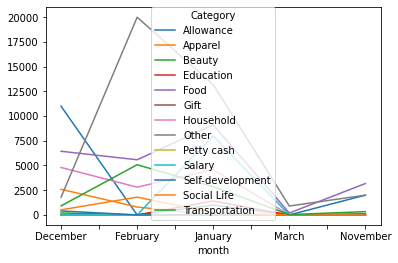

In [201]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()

In [203]:
# now plotting on "income/ Expense"

<AxesSubplot: xlabel='month'>

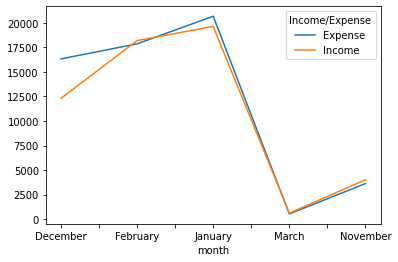

In [204]:
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot() 
# this graph shows this man spend more than his income even.

In [205]:
df.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March


In [206]:
# now applying plot on "Account"

<AxesSubplot: xlabel='month'>

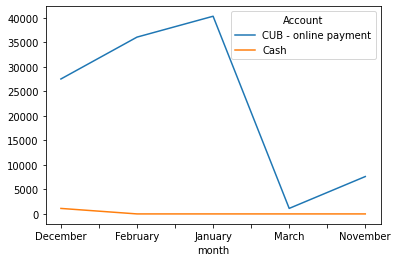

In [207]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()
# this graph shows this man spend money online , cash spend is zero almost in every month.